In [3]:
import sys
# Check Python version
if sys.version_info.major == 3 and sys.version_info.minor >= 6:
    print("Hello, World!")
    print(f"Python version: {sys.version}")
else:
    print("Please use Python 3.6 or higher.")

Hello, World!
Python version: 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]


In [7]:
time_data = [
(3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
(4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
(5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
(3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
(4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]

In [9]:
# Task 1. Classify Study Time:
low_study=[]
moderate_study=[]
high_study=[]
for i in time_data:
    if (i[0]<3.):
        low_study.append(i[0]);
    elif(i[0]>=3 and i[0]<5):
        moderate_study.append(i[0]);
    else:
        high_study.append(i[0]);
print(f"Low:{low_study}\nModerate:{moderate_study}\nHigh:{high_study}")

Low:[2.5, 1.5, 2.0, 2.5]
Moderate:[3.5, 4.0, 3.0, 4.5, 3.0, 4.0, 3.5]
High:[5.0, 5.5, 6.0, 5.0]


In [10]:
# Task 2. Based on Data – Answer all the Questions:
# How many days had what study times?
print(f"{len(low_study)} days had low study time")
print(f"{len(moderate_study)} days had moderate study time")
print(f"{len(high_study)} days had high study time")

4 days had low study time
7 days had moderate study time
4 days had high study time


In [11]:
# Task 3. Convert Study Hours to Minutes:
study_minutes=[i[0]*60 for i in time_data]
print(study_minutes)

[210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


In [33]:
# Task 4. Analyze Average Time Use:
study_hours=[i[0] for i in time_data]
entertainment_hours=[i[1] for i in time_data]
sleep_hours=[i[2] for i in time_data]

avg_study=sum(study_hours)/len(study_hours)
avg_entertainment=sum(entertainment_hours)/len(entertainment_hours)
avg_sleep=sum(sleep_hours)/len(sleep_hours)

print(f"Time Spent Studying: {avg_study:.2f}hours")
print(f"Time Spent On Entertainment: {avg_entertainment:.2f}hours")
print(f"Time Spent Sleeping: {avg_sleep:.2f}hours")


Time Spent Studying: 3.70hours
Time Spent On Entertainment: 2.50hours
Time Spent Sleeping: 7.17hours


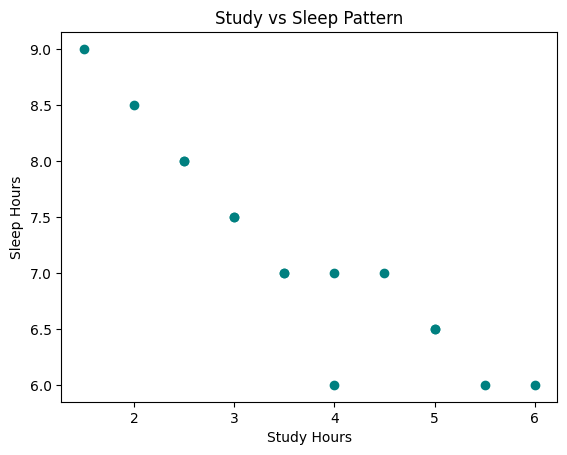

In [17]:
# Task 5. Visualization - Study vs Sleep Pattern:
import matplotlib.pyplot as plt
plt.scatter(study_hours,sleep_hours,color="teal")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep Pattern")
plt.show()

In [41]:
# 8.1.1 Exercise - Recursion:

In [32]:
# Task 1 - Sum of Nested Lists:
nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
def sum(nested_list):
    total=0
    for i in nested_list:
        if isinstance(i,list):
            total+=sum(i)
        else:
            total+=i
    return total
print(f"Sum: {sum(nested_list)}")

Sum: 36


In [19]:
# Task 2 - Generate All Permutations of a String:
def generate_permutations(s):
    if len(s)<=1:
        return [s]
    perms=set()
    for i in range(len(s)):
        first=s[i]
        last=s[:i]+s[1+i:]
        for p in generate_permutations(last):
            perms.add(first+p)
    return list(perms)
print(generate_permutations('abc'))

['bca', 'bac', 'acb', 'cab', 'cba', 'abc']


In [29]:
# Task 3 - Directory Size Calculation:
directory_structure = {
"file1.txt": 200,
"file2.txt": 300,
"subdir1": {
"file3.txt": 400,
"file4.txt": 100
},
"subdir2": {
"subsubdir1": {
"file5.txt": 250
},
"file6.txt": 150
}
}
def calculate_directory_size(directory):
    total=0
    for key,value in directory.items():
        if isinstance(value,dict):
            total+=calculate_directory_size(value)
        else:
            total+=value
    return total
print(f"Total directory size: {calculate_directory_size(directory_structure)} bytes")

Total directory size: 1400 bytes


In [28]:
# 8.2.1 Exercises - Dynamic Programming:
def min_coins(coins,amount):
    dp=[float('inf')]*(amount + 1)
    dp[0]=0
    for coin in coins:
        for i in range(coin,amount + 1):
            dp[i] = min(dp[i],dp[i-coin]+1)
    return dp[amount] if dp[amount]!=float('inf') else -1       
        
coins=[1,2,5]
amount=11
print(f"Minimum coins required: {min_coins(coins, amount)}")

Minimum coins required: 3


In [26]:
# Task 2 - Longest Common Subsequence (LCS):
def longest_common_subsequence(s1, s2):
    m, n = len(s1), len(s2)
    dp = [[0]*(n+1) for _ in range(m+1)]  

    for i in range(1, m+1):
        for j in range(1, n+1):
            if s1[i-1]==s2[j-1]:
                dp[i][j]=dp[i-1][j-1] + 1
            else:
                dp[i][j]=max(dp[i-1][j], dp[i][j-1])

    return dp[m][n]

s1="abcde"
s2="ace"
print(f"Longest Common Subsequence: {longest_common_subsequence(s1, s2)}") 

Longest Common Subsequence: 3


In [27]:
# Task 3 - 0/1 Knapsack Problem:
def knapsack(weights,values,capacity):
    n=len(weights)
    dp=[[0]*(capacity+1) for _ in range(n+1)]

    for i in range(1, n+1):
        for w in range(1, capacity+1):
            if weights[i-1]<=w:
                dp[i][w]= max(dp[i-1][w],dp[i-1][w-weights[i-1]]+values[i-1])
            else:
                dp[i][w]=dp[i-1][w]
    return dp[n][capacity]

weights=[1, 3, 4, 5]
values=[1, 4, 5, 7]
capacity=7
print(f"Max value: {knapsack(weights, values, capacity)}")

Max value: 9
